# Shapefiles

The shapefiles are downloaded from OCHA (https://data.humdata.org/) website.

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors, patheffects
import seaborn as sns

In [2]:
# Set a value for the column width layout.
pd.options.display.max_colwidth = 20

In [3]:
# Set default sizes for figures.
plt.style.use("default") # style matplotlib
plt.rc("axes", labelsize = 15) # fontsize of the x and y labels
plt.rc("axes", titlesize = 15) # fontsize of the axes title
plt.rc("xtick", labelsize = 15) # fontsize of the tick labels
plt.rc("ytick", labelsize = 15) # fontsize of the tick labels
plt.rc("legend", fontsize = 15) # legend fontsize

In this notebook, we load the shapefiles representing the political boundaries of various countries.

In [4]:
# Define the path to the shapefile data released by OCHA.
PATH_TO_SHAPEFILES = "../../packages/MapPlot/shapefiles/adminstratas/"

# Map world

In [5]:
yemen = gpd.read_file(PATH_TO_SHAPEFILES + "Yemen/Yemen.shp")
mali = gpd.read_file(PATH_TO_SHAPEFILES + "Mali/mali.shp")
burkina_faso = gpd.read_file(PATH_TO_SHAPEFILES + "Burkina Faso/Burkina Faso.shp")
syria = gpd.read_file(PATH_TO_SHAPEFILES + "Syria/Syria.shp")
nigeria = gpd.read_file(PATH_TO_SHAPEFILES + "Nigeria/Nigeria.shp")
cameroon = gpd.read_file(PATH_TO_SHAPEFILES + "Cameroon/Cameroon.shp")

In [6]:
# Define the adminstatas to color into the map.
adminstratas = {"Yemen": ['Al Hudaydah', 'Al Jawf', 'Al Maharah', 'Al Mahwit', 'Amanat Al Asimah', 'Amran', 'Dhamar','Hajjah',
                          'Ibb', 'Lahj', 'Marib', 'Raymah', "Sa'ada", "Sana'a", 'Shabwah', 'Taizz', 'Abyan', 'Aden', 'Al Bayda',
                          "Al Dhale'e"], 
                "Syria": ['Tartous', 'Al-Hasakeh', 'Aleppo', 'As-Sweida', 'Damascus', "Dar'a", 'Hama', 'Homs', 'Lattakia', 'Rural Damascus', 'Ar-Raqqa',
                          'Deir-ez-Zor'], 
                "Burkina Faso": ['Centre', 'Centre-Sud', 'Plateau-Central', 'Centre-Est', 'Est', 'Sahel', 'Boucle-Du-Mouhoun', 
                                 'Centre-Nord', 'Hauts-Bassins', 'Sud-Ouest', 'Cascades', 'Centre-Ouest', 'Nord'], 
                "Nigeria": ['Adamawa', 'Borno', 'Yobe'], 
                "Cameroon": ['South-West', 'Adamawa', 'Central', 'East', 'Far-North', 'Littoral', 'North', 'West', 'North-West'], 
                "Mali": ['Mopti', 'Segou', 'Tombouctou-Taoudeni', 'Bamako', 'Kayes', 'Koulikoro', 'Sikasso']}

In [7]:
# Define world and countries geopandas dataframe.
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries = pd.concat([mali, yemen, syria, nigeria, cameroon, burkina_faso])

# Draw only the selected provinces for each country.
countries["draw"] = countries.apply(lambda x: 1 if x["region"] in adminstratas[x["country"]] else np.nan, axis = 1)
countries.head()

,region,country,geometry,draw
0,Bamako,Mali,POLYGON ((-7.929...,1.0
1,Gao-Menaka,Mali,POLYGON ((0.3757...,NaN
2,Kayes,Mali,POLYGON ((-9.330...,1.0
3,Kidal,Mali,POLYGON ((1.2012...,NaN
4,Koulikoro,Mali,POLYGON ((-9.000...,1.0


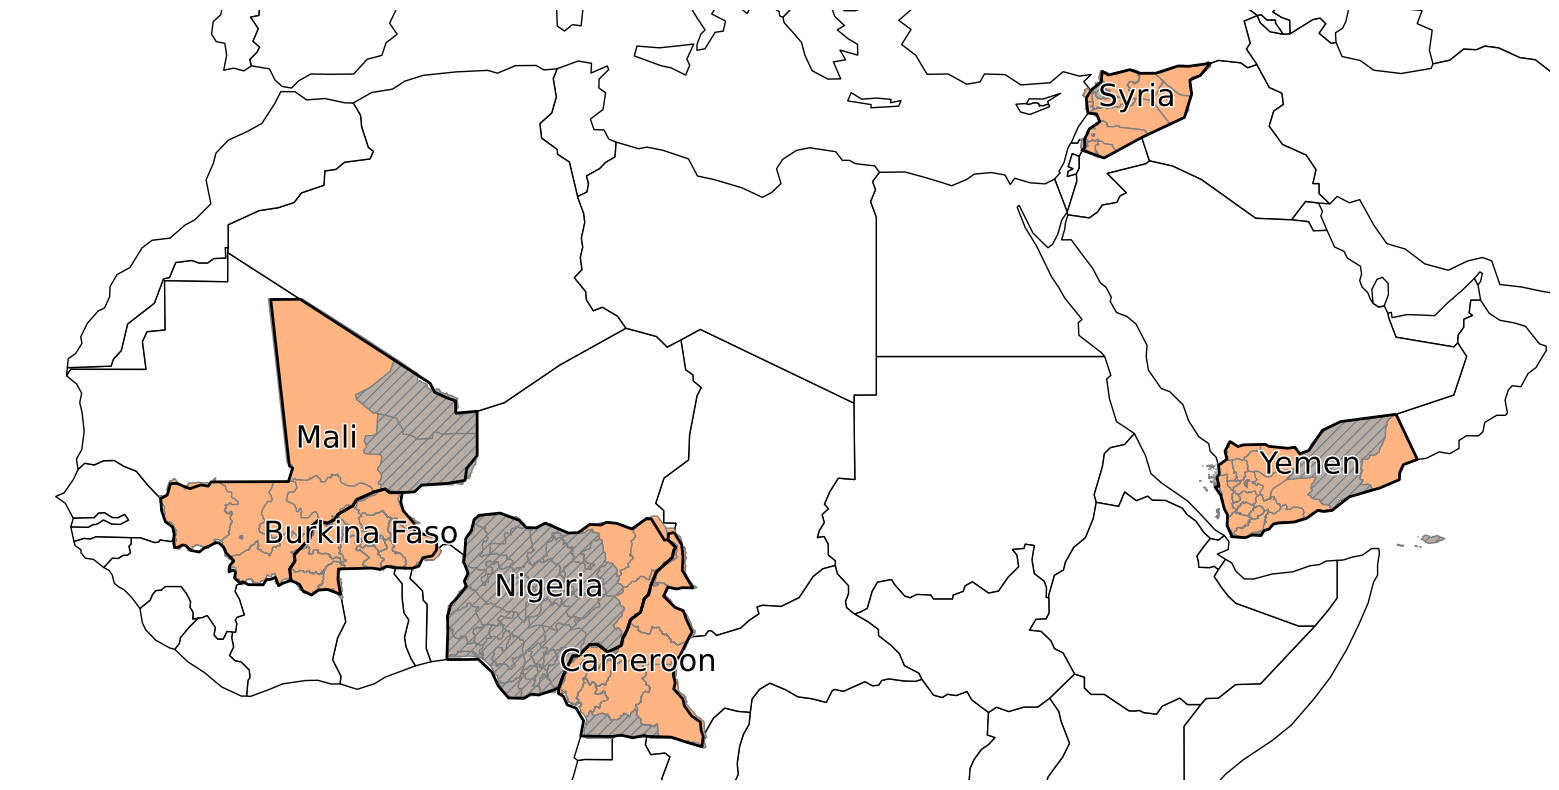

In [8]:
fig, ax = plt.subplots(figsize = (30, 10))
# Create custom cmap.
cmap = colors.ListedColormap([sns.color_palette("pastel")[1]])

world.plot(ax = ax, color = "white", edgecolor = "black")
countries.plot(column = "draw", ax = ax, cmap = cmap, edgecolor = "grey", legend = False, alpha = 1.,
               missing_kwds = {"color": "#b7ada7", "edgecolor": "grey", "hatch": "///", "label": "Missing values"})

boundaries = world[world.name.isin(["Yemen", "Nigeria", "Syria", "Cameroon", "Mali", "Burkina Faso"])]
boundaries.plot(ax = ax, color = "None", edgecolor = "black", linewidth = 2)

for x, y, label in zip(boundaries.centroid.geometry.x, boundaries.centroid.geometry.y, boundaries["name"]):
    ax.text(x, y, label, ha = "center", size = 22, path_effects = [patheffects.withStroke(linewidth = 2, foreground = "w")])

ax.axis([-20, 60, 0, 40])
ax.set_aspect("equal")
ax.axis("off")

fig.savefig("world.png", dpi = 300, bbox_inches = "tight")